In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
a, b, d, n_input = 4, 7, 0.2, 4

In [4]:
def f(a, b, d, x):
    return a * np.sin(b * x) + d; 

In [5]:
amount = 30
tspan = [0, 0.89]

step = (tspan[1] - tspan[0]) / amount
X = np.arange(tspan[0], tspan[1], step)
y = np.array([f(a, b, d, _) for _ in X])
n = y.shape[0] - n_input - 1

X_train = np.empty((n, n_input), dtype=float)
y_train = np.empty(n, dtype=float)

for i in range(n):
    for j in range(0, n_input, 1):
        X_train[i][j] = y[i + j]
    y_train[i] = y[i + n_input]
    
X = np.array([tspan[1] + _ * step for _ in range(0, amount, 1)])
y = np.array([f(a, b, d, _) for _ in X])
    
X_test = np.empty((n, n_input), dtype=float)
y_test = np.empty(n, dtype=float)

for i in range(n):
    for j in range(0, n_input, 1):
        X_test[i][j] = y[i + j]
    y_test[i] = y[i + n_input]
    
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25, 4) (25,) (25, 4) (25,)


In [11]:
class LinearModel:
    
    
    def __init__(self):
        self.w = None
        self.lr = None
        self.n_input = None 
        
        
    def test(self, y_test):
        y_pred = []
        for _ in range(y_test.shape[0]):
            y_pred.append(model.predict(X_test[_]))
        print(f"mean |y-e| = {np.mean(np.abs(y_test - y_pred))}")
        plt.plot(X, y, color='green') 
        plt.plot(X[n_input:-1], y_pred, color='red') 
        plt.show()

        
    def fit(self, X_train, y_train, mode='classic', opt='const', lr=0.01, epoches=100, e=1e-3, batch_size=4):
        
        self.lr = lr
        self.n_input = X_train.shape[1]
        self.epoches = epoches
        
        self.w = np.random.uniform(0, 1, self.n_input + 1)
                    
        loss = []
        
        if mode == 'online-learning' and opt == 'const':
            for ep in range(epoches):
                y_pred = np.empty(y_train.shape, dtype=float)
                for i in range(len(X_train)):
                    y_pred[i] = self.predict(X_train[i])
                    self.w -= lr * self.grad(X_train[i], y_pred[i], y_train[i])
                loss.append(self.mse(y_pred, y_train))
                if loss[-1] < e:
                    break
        
        if mode == 'online-learning' and opt == 'adapted':
            for ep in range(epoches):
                y_pred = np.empty(y_train.shape, dtype=float)
                for i in range(len(X_train)):
                    y_pred[i] = self.predict(X_train[i])
                    lr = 1 / (1 + np.sum(np.square(X_train[i])))
                    self.w -= lr * self.grad(X_train[i], y_pred[i], y_train[i])
                loss.append(self.mse(y_pred, y_train))
                if loss[-1] < e:
                    break
                    
        if mode == 'batch-learning' and opt == 'const':
            n = y_train.shape[0] // batch_size * batch_size
            for ep in range(epoches):
                y_pred = np.empty(n , dtype=float)
                
                for b in range(0, n, batch_size):
                    grad = np.zeros(self.n_input + 1, dtype=float)
                    for i in range(batch_size):
                        y_pred[b + i] = self.predict(X_train[b + i])
                        grad += self.grad(X_train[b + i], y_pred[b + i], y_train[b + i])
                    self.w -= lr * grad / batch_size
                loss.append(self.mse(y_pred, y_train[:n]))
                if loss[-1] < e:
                    break
                    
        if mode == 'batch-learning' and opt == 'adapted':
            n = y_train.shape[0] // batch_size * batch_size
            for ep in range(epoches):
                y_pred = np.empty(n , dtype=float)
                for b in range(0, n, batch_size):
                    grad = np.zeros(self.n_input + 1, dtype=float)
                    for i in range(batch_size):
                        y_pred[b + i] = self.predict(X_train[b + i])
                        grad += self.grad(X_train[b + i], y_pred[b + i], y_train[b + i])
                    a = [(y_pred[b + p] - y_train[b + p]) * (1 + np.sum(np.square(X_train[b:b+batch_size]))) for p in range(batch_size)]
                    tlr = np.sum([(y_pred[b + p] - y_train[b + p]) * a[p] for p in range(batch_size)])
                    blr = np.sum([a[p] ** 2 for p in range(batch_size)])
                    lr = tlr / blr
                    self.w -= lr * grad
                loss.append(self.mse(y_pred, y_train[:n]))
                if loss[-1] < e:
                    break
            
        plt.plot(range(len(loss)), loss) 
        plt.show()             
    
    
    def mse(self, y_pred, y_real):
        return 1 / 2 * np.sum(np.square(y_pred - y_real))
    
    
    def predict(self, X):
        if X.shape[0] < self.n_input + 1:
            X = np.concatenate((X, np.ones(1)), axis=0)
        return np.dot(X, self.w)
    
    
    def grad(self, X, y_pred, y_real):
        if X.shape[0] < self.n_input + 1:
            X = np.concatenate((X, np.ones(1)), axis=0)
        return (y_pred - y_real) * X
        
        
    def W(self):
        return self.w

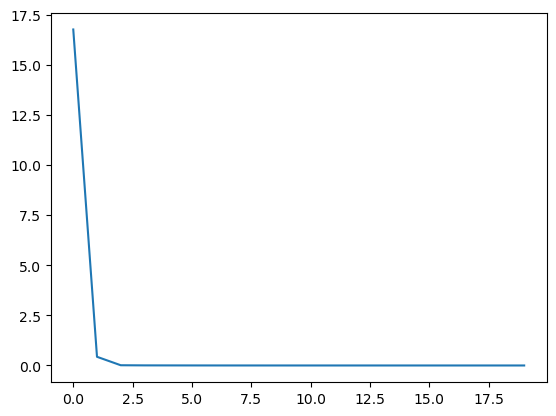

mean |y-e| = 0.00042449090740905195


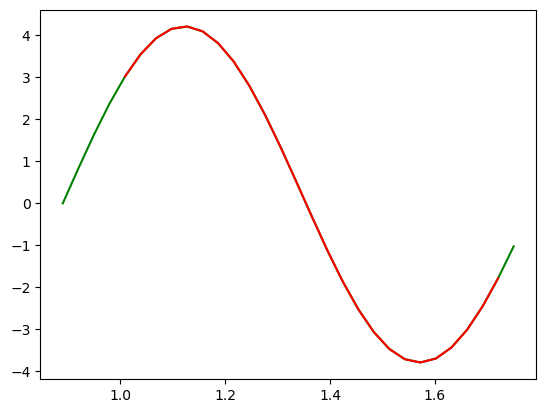

In [12]:
model = LinearModel()
model.fit(X_train, y_train, mode='online-learning', opt='const', lr=0.045, epoches=100, e=1e-6)
model.test(y_test)

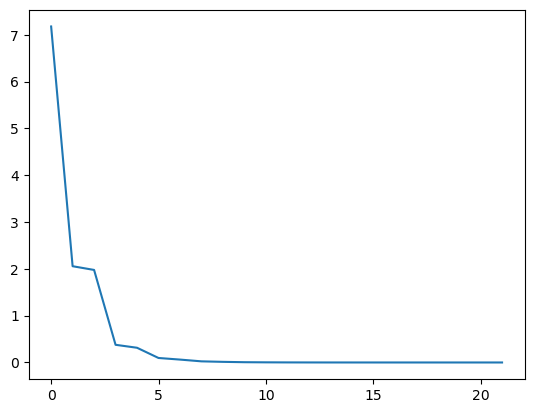

mean |y-e| = 0.0005565359259348801


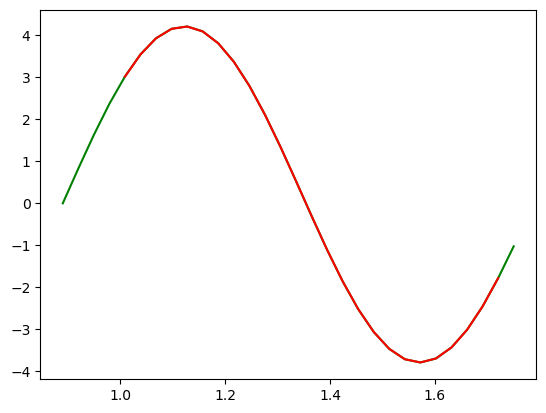

In [13]:
model = LinearModel()
model.fit(X_train, y_train, mode='online-learning', opt='adapted', epoches=100, e=1e-6)
model.test(y_test)

C:\Users\kopan\AppData\Local\Temp\ipykernel_10960\2320871876.py:89: RuntimeWarning: overflow encountered in square
  return 1 / 2 * np.sum(np.square(y_pred - y_real))
C:\Users\kopan\AppData\Local\Temp\ipykernel_10960\2320871876.py:60: RuntimeWarning: overflow encountered in add
  grad += self.grad(X_train[b + i], y_pred[b + i], y_train[b + i])
C:\Users\kopan\AppData\Local\Temp\ipykernel_10960\2320871876.py:61: RuntimeWarning: invalid value encountered in subtract
  self.w -= lr * grad


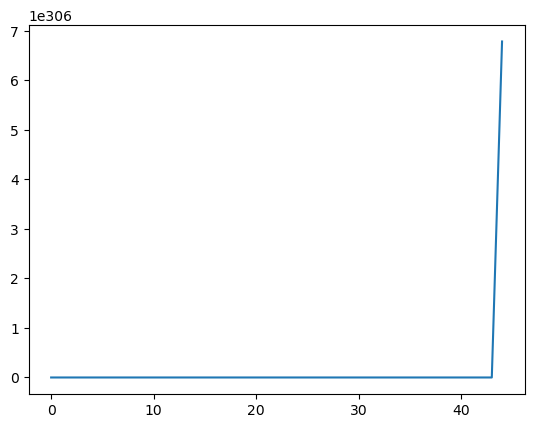

mean |y-e| = nan


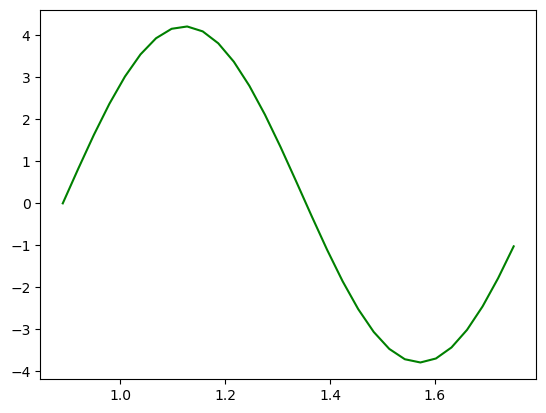

In [19]:
model = LinearModel()
model.fit(X_train, y_train, mode='batch-learning', opt='const', batch_size=4, lr=0.045, epoches=100, e=1e-6)
model.test(y_test)

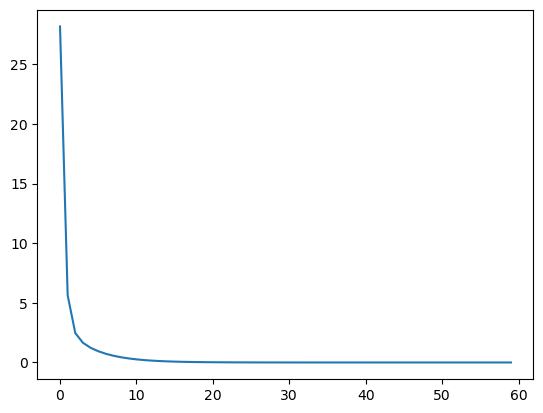

mean |y-e| = 0.00023200597223274277


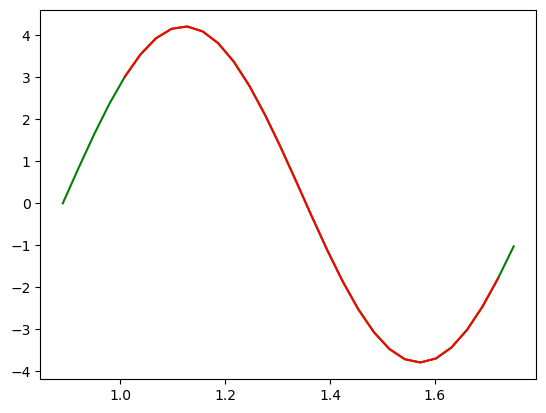

In [20]:
model = LinearModel()
model.fit(X_train, y_train, mode='batch-learning', opt='adapted', lr=0.03, batch_size=4, epoches=100, e=1e-6)
model.test(y_test)